In [100]:
import pandas as pd
import seaborn as sns
import folium
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df= pd.read_csv("data/syriatel_customer_churn.csv")

In [3]:
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [4]:
#cleaning of the col names
df.columns = df.columns.str.replace(' ', "_")
        

In [5]:
df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [6]:
df['churn']= df["churn"].astype(int)

In [7]:
df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [8]:
df["churn"].value_counts(normalize = True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

There may be a class imbalance : not terrible

## Start exploring some features 

In [9]:
df['total_min']= df['total_day_minutes']+ df['total_eve_minutes'] + df['total_intl_minutes']+df['total_night_minutes']

In [10]:
df['total_calls_dom'] = df['total_day_calls'] + df['total_night_calls']+ df['total_eve_calls']

In [11]:
df["total_calls"] = df['total_day_calls'] + df['total_night_calls']+df['total_intl_calls']+df['total_eve_calls']
df['total_charge_dom'] = df['total_day_calls'] + df['total_eve_charge'] + df['total_night_charge']

df['total_charge'] = df['total_day_calls'] + df['total_eve_charge'] + df['total_night_charge'] + df['total_intl_charge']

In [12]:

#new feature to measure customer service calls ratio tot total calls
df['call_satisfaction'] = df['customer_service_calls']/df['total_calls']

In [13]:
df["charge_per_min_dom"] = df['total_charge_dom']/df['total_calls_dom']
df['charge_per_min_intl'] = df['total_intl_charge']/ df['total_intl_calls']

In [14]:
df['call_satisfaction'].describe()

count    3333.000000
mean        0.005198
std         0.004456
min         0.000000
25%         0.002890
50%         0.003663
75%         0.007273
max         0.030303
Name: call_satisfaction, dtype: float64

In [15]:
df["%_int_min"]= df['total_intl_minutes']/ df['total_min']


In [16]:
states = {
        'AK': 'West',
        'AL': 'South',
        'AR': 'South',
        'AZ': 'West',
        'CA': 'West',
        'CO': 'West',
        'CT': 'Northeast',
        'DC': 'South',
        'DE': 'South',
        'FL': 'South',
        'GA': 'South',
        'HI': 'West',
        'IA': 'Midwest',
        'ID': 'West',
        'IL': 'Midwest',
        'IN': 'Midwest',
        'KS': 'Midwest',
        'KY': 'South',
        'LA': 'South',
        'MA': 'Northeast',
        'MD': 'South',
        'ME': 'Northeast',
        'MI': 'Midwest',
        'MN': 'Midwest',
        'MO': 'Midwest',
        'MS': 'South',
        'MT': 'West',
        'NC': 'South',
        'ND': 'Midwest',
        'NE': 'Midwest',
        'NH': 'Northeast',
        'NJ': 'Northeast',
        'NM': 'West',
        'NV': 'West',
        'NY': 'Northeast',
        'OH': 'Midwest',
        'OK': 'South',
        'OR': 'West',
        'PA': 'Northeast',
        'RI': 'Northeast',
        'SC': 'South',
        'SD': 'Midwest',
        'TN': 'South',
        'TX': 'South',
        'UT': 'West',
        'VA': 'South',
        'VT': 'Northeast',
        'WA': 'West',
        'WI': 'Midwest',
        'WV': 'South',
        'WY': 'West'
}

In [17]:
df['region']= df['state'].replace(states)

In [18]:
df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_min,total_calls_dom,total_calls,total_charge_dom,total_charge,call_satisfaction,charge_per_min_dom,charge_per_min_intl,%_int_min,region
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,717.2,300,303,137.79,140.49,0.003300,0.459300,0.900000,0.013943,Midwest
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,625.2,329,332,151.07,154.77,0.003012,0.459179,1.233333,0.021913,Midwest
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,539.4,328,333,131.62,134.91,0.000000,0.401280,0.658000,0.022618,Northeast
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,564.8,248,255,85.12,86.90,0.007843,0.343226,0.254286,0.011686,Midwest
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,512.0,356,359,134.02,136.75,0.008357,0.376461,0.910000,0.019727,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,660.7,286,292,107.88,110.55,0.006849,0.377203,0.445000,0.014984,West
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,585.4,235,239,78.65,81.24,0.012552,0.334681,0.647500,0.016399,South
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,675.6,258,264,142.19,146.00,0.007576,0.551124,0.635000,0.020870,Northeast
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,517.6,326,336,124.83,126.18,0.005952,0.382914,0.135000,0.009660,Northeast


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

In [119]:
# seperating the continous and categorical variables into two data frames for data exploration

df_cont = df.select_dtypes(include=['number'])
df_cont= df_cont.drop("churn", 1)
df_cat = df.select_dtypes(exclude=['number'])

In [120]:
df_cat

,state,phone_number,international_plan,voice_mail_plan,region
0,KS,382-4657,no,yes,Midwest
1,OH,371-7191,no,yes,Midwest
2,NJ,358-1921,no,no,Northeast
3,OH,375-9999,yes,no,Midwest
4,OK,330-6626,yes,no,South
...,...,...,...,...,...
3328,AZ,414-4276,no,yes,West
3329,WV,370-3271,no,no,South
3330,RI,328-8230,no,no,Northeast
3331,CT,364-6381,yes,no,Northeast


In [121]:
df_cat.info()
df_cat.drop(['phone_number', 'state'], 1, inplace= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   state               3333 non-null   object
 1   phone_number        3333 non-null   object
 2   international_plan  3333 non-null   object
 3   voice_mail_plan     3333 non-null   object
 4   region              3333 non-null   object
dtypes: object(5)
memory usage: 130.3+ KB


/Users/tbai/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



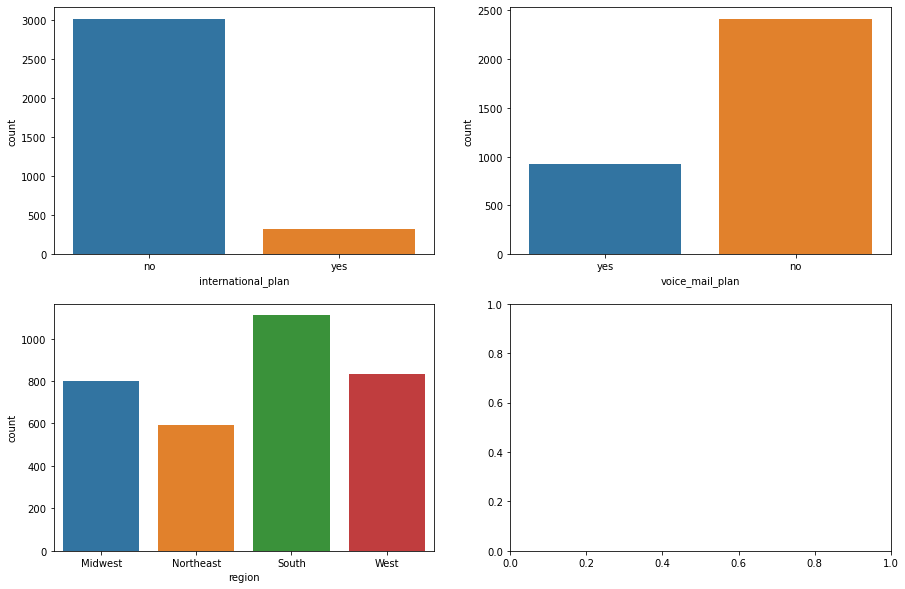

In [122]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for variable, subplot in zip(df_cat.columns, ax.flatten()):
    sns.countplot(x =df_cat[variable], ax=subplot )

Seems that not many people have international plans.
region seems 

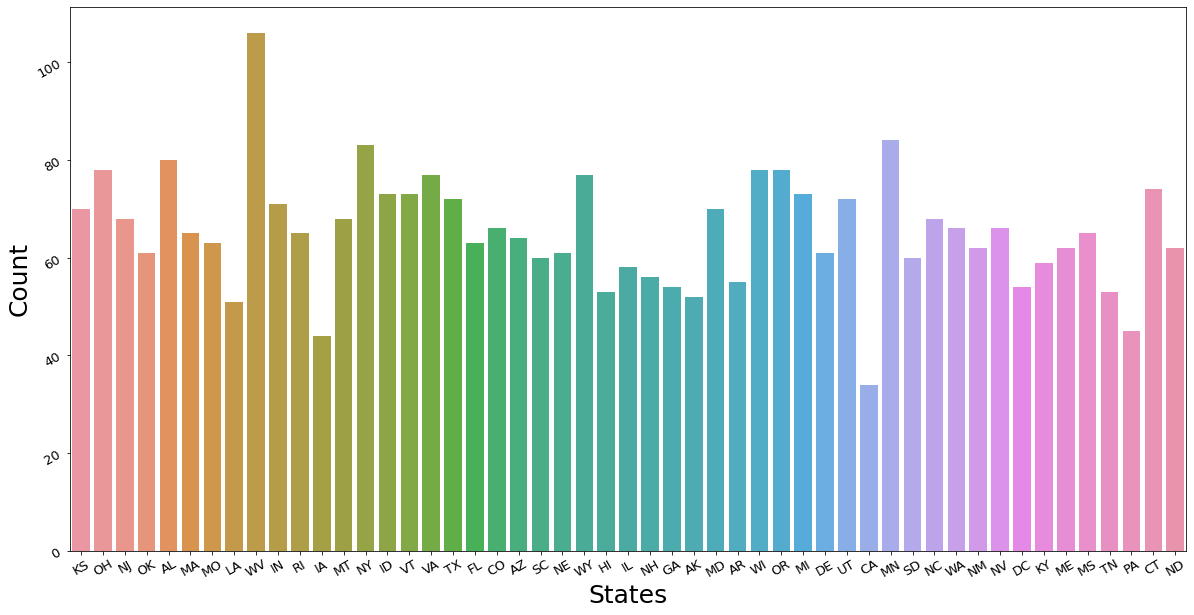

In [123]:
fig, ax = plt.subplots(figsize=(20, 10))
state_plot = sns.countplot(x = df['state']);
plt.xlabel("States",size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(size = 13, rotation = 30);
plt.yticks(size = 13, rotation = 30);

In [124]:
state_count1=df[['state','churn']]
state_churn=state_count1[state_count1['churn']== 1].groupby('state',as_index = False).count()

state_count2=df[['state','churn']].groupby('state',as_index = False).count()
state_count2.rename(columns={"churn":"total_cust"},inplace=True)

state_churn['total_cust']=state_count2['total_cust']
state_churn['%churn']=(state_churn['churn']/state_count2['total_cust'])*100

In [125]:
fig = go.Figure(data=go.Choropleth(
    locations=state_churn['state'], # Spatial coordinates
    z = state_churn['%churn'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'GnBu',
    colorbar_title = "churn percentage %",
))

fig.update_layout(
    title_text = 'Customer churns by State',
    geo_scope='usa', # limit map scope to US
)

fig.show()

# Churn By State:
 * worst states are Texas, New Jersey and California

In [126]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn', 'total_min', 'total_calls_dom',
       'total_calls', 'total_charge_dom', 'total_charge', 'call_satisfaction',
       'charge_per_min_dom', 'charge_per_min_intl', '%_int_min', 'region'],
      dtype='object')

In [127]:
df.isnull().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
total_min                 0
total_calls_dom           0
total_calls               0
total_charge_dom          0
total_charge              0
call_satisfaction         0
charge_per_min_dom        0
charge_per_min_intl       0
%_int_min                 0
region                    0
dtype: int64

In [128]:
# filled the charge per_min_intl since some values were divided by 0
df.fillna(0, inplace= True)

In [129]:
df.isnull().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
total_min                 0
total_calls_dom           0
total_calls               0
total_charge_dom          0
total_charge              0
call_satisfaction         0
charge_per_min_dom        0
charge_per_min_intl       0
%_int_min                 0
region                    0
dtype: int64

In [159]:
y= df['churn']
X= df.drop(['churn', 'state', 'phone_number'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3 ,random_state=42)

## Pipeline

In [160]:
# X_num = df_cont.columns
# X_cat= df_cat.columns

In [161]:
# numTrans = Pipeline(steps=[
#     ('scaler', StandardScaler())
# ])
# catTrans = Pipeline(steps=[
#     ('ohe', OneHotEncoder(drop='first',
#                           sparse=False))
# ])

# pp = ColumnTransformer(transformers=[
#     ('num', numTrans, X_num),
#     ('cat', catTrans, X_cat)
# ])

In [162]:
# X_test_clean = pp.fit_transform(X_test)

In [163]:
# X_test_clean=pd.DataFrame(X_test_clean)

In [164]:
# transforming the categorical variables 
X_train_cat = X_train.select_dtypes(exclude=['number'])

ohe = OneHotEncoder(
    drop='first',
    sparse=False)

dums = ohe.fit_transform(X_train_cat)
dums_df = pd.DataFrame(dums,
                       columns=ohe.get_feature_names(),
                       index=X_train_cat.index)

In [165]:
#scaling the continous variables
X_train_nums = X_train.select_dtypes('float64')

ss = StandardScaler()

ss.fit(X_train_nums)
nums_df = pd.DataFrame(ss.transform(X_train_nums),
                      index=X_train_nums.index)


nums_df.columns= X_train_nums.columns

In [179]:
X_test_cat = X_test.select_dtypes(exclude=['number'])

ohe = OneHotEncoder(
    drop='first',
    sparse=False)

dums_2 = ohe.fit_transform(X_test_cat)
dums_df2 = pd.DataFrame(dums_2,
                       columns=ohe.get_feature_names(),
                       index=X_test_cat.index)

X_test_nums = X_test.select_dtypes('float64')

ss = StandardScaler()

ss.fit(X_test_nums)
nums_df2 = pd.DataFrame(ss.transform(X_test_nums),
                      index=X_test_nums.index)


nums_df2.columns= X_train_nums.columns

In [180]:
X_train_clean = pd.concat([dums_df, nums_df],1)
X_test_clean = pd.concat([dums_df2, nums_df2],1)

In [181]:
X_train_clean

,x0_yes,x1_yes,x2_Northeast,x2_South,x2_West,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge,total_night_minutes,total_night_charge,total_intl_minutes,total_intl_charge,total_min,total_charge_dom,total_charge,call_satisfaction,charge_per_min_dom,charge_per_min_intl,%_int_min
2016,0.0,0.0,1.0,0.0,0.0,0.410716,0.410877,1.167102,1.167733,-0.456961,-0.458282,-0.373682,-0.379643,0.640622,1.044943,1.030191,1.044815,1.264866,-0.567143,-0.627093
1362,0.0,0.0,0.0,1.0,0.0,-0.864713,-0.865095,-2.639021,-2.637901,-0.790790,-0.789925,-0.122835,-0.127479,-2.478104,0.400332,0.395342,1.008973,0.324584,0.815131,1.585515
2670,0.0,1.0,0.0,0.0,1.0,0.752053,0.752000,-0.984185,-0.983076,-0.425542,-0.423373,-0.445353,-0.446002,-0.356476,0.105904,0.089402,0.264224,-0.028174,-0.717068,-0.292651
2210,0.0,0.0,0.0,0.0,1.0,1.814605,1.814230,-0.211928,-0.211288,1.070799,1.069020,0.522200,0.522840,1.610893,0.533851,0.552710,-1.155889,1.744948,-0.640575,-0.323398
1846,0.0,1.0,1.0,0.0,0.0,-0.038896,-0.039276,-0.509404,-0.510269,-0.773117,-0.772470,0.450529,0.456481,-0.738771,0.606725,0.623086,-0.436611,0.580761,-0.103365,0.728200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.0,0.0,0.0,0.0,1.0,1.732023,1.732188,-0.046444,-0.046732,-0.782936,-0.781198,-1.520411,-1.521019,0.535547,0.850288,0.793650,-0.326160,2.054204,-0.494652,-1.470765
1130,0.0,0.0,1.0,0.0,0.0,-2.659490,-2.659228,-0.397112,-0.396702,1.000106,0.999200,0.880552,0.881179,-1.248499,-1.860699,-1.826876,-0.105948,0.023812,1.441190,1.533594
1294,0.0,0.0,0.0,0.0,1.0,-1.696036,-1.696312,1.202563,1.202498,-0.315574,-0.314280,-0.373682,-0.379643,-0.542034,-0.985730,-0.998981,-0.457032,-1.358426,-0.567143,-0.141458
860,0.0,0.0,0.0,0.0,1.0,-0.015039,-0.015527,-0.507434,-0.507951,0.548455,0.549737,-0.122835,-0.127479,0.011288,0.461956,0.456921,0.151117,-0.233507,-0.651167,-0.182442


In [182]:
X_test_clean

,x0_yes,x1_yes,x2_Northeast,x2_South,x2_West,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge,total_night_minutes,total_night_charge,total_intl_minutes,total_intl_charge,total_min,total_charge_dom,total_charge,call_satisfaction,charge_per_min_dom,charge_per_min_intl,%_int_min
438,0.0,0.0,0.0,0.0,1.0,-0.445110,-0.445175,2.561623,2.561418,-0.240205,-0.241616,1.172579,1.178729,1.061954,0.165651,0.207530,-0.481091,-0.307370,0.627372,0.340880
2674,0.0,0.0,0.0,0.0,0.0,-1.289176,-1.288918,0.323576,0.323785,-0.260318,-0.259494,0.921990,0.926765,-0.704043,0.849735,0.880854,-1.193959,-0.758702,-0.400194,1.166827
1345,0.0,0.0,0.0,0.0,0.0,-3.295441,-3.295512,-0.819173,-0.818292,-0.688735,-0.688564,-1.225919,-1.221563,-2.836857,-5.011735,-5.042972,3.037678,-5.680282,1.628178,0.479823
1957,0.0,0.0,0.0,1.0,0.0,0.617788,0.618158,0.060625,0.060944,-0.907972,-0.907568,-0.008771,-0.014786,-0.093412,-1.086119,-1.083920,-0.381040,-0.961779,0.881587,-0.036015
2148,0.0,0.0,0.0,0.0,1.0,-0.647391,-0.647457,0.467902,0.467998,0.530140,0.531604,-0.080368,-0.081093,0.160285,0.248180,0.244646,-0.345307,1.295884,-0.706781,-0.212980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,0.0,0.0,0.0,0.0,0.0,-0.805539,-0.805388,0.713059,0.712230,-1.670272,-1.671849,2.604518,2.610948,-0.917105,0.063086,0.156614,-1.193959,-0.270120,0.572515,2.974296
2548,0.0,1.0,0.0,0.0,0.0,-0.478210,-0.478708,1.231053,1.230933,-1.334377,-1.332169,0.599803,0.595233,-0.311965,0.682769,0.702411,-0.456118,0.658581,-0.589804,0.609881
2916,0.0,0.0,0.0,1.0,0.0,-1.206424,-1.206707,-0.838944,-0.839227,-0.274398,-0.272902,0.098625,0.104565,-1.333344,-0.821359,-0.815542,0.472819,-0.343715,-0.566103,0.823045
2655,0.0,0.0,0.0,0.0,0.0,0.735479,0.734983,-0.672869,-0.671753,-0.803382,-0.804770,-0.080368,-0.081093,-0.375664,-1.511645,-1.510755,-0.309676,-0.922277,-0.459065,0.043462


In [45]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [46]:
X_train_clean.isnull().sum()

x0_yes          0
x1_yes          0
x2_Northeast    0
x2_South        0
x2_West         0
0               0
1               0
2               0
3               0
4               0
5               0
6               0
7               0
8               0
9               0
10              0
11              0
12              0
13              0
14              0
dtype: int64

# Baseline Model Logistic Classification

In [64]:
log_reg.fit(X_train_clean, y_train)

LogisticRegression()

In [50]:
log_reg.score(X_train_clean, y_train)

0.866266609515645

In [65]:
base_pred = log_reg.predict(X_train_clean)

In [67]:
def scores(actual, pred):
    print("log loss: ", log_loss(actual, pred))
    print("accuracy: ", accuracy_score(actual, pred))
    print("precision:", precision_score(actual, pred))
    print("recall:   ", recall_score(actual, pred))

In [68]:
scores(y_train, base_pred)

log loss:  4.619005149884729
accuracy:  0.866266609515645
precision: 0.6076923076923076
recall:    0.2323529411764706


## Random Forest

In [241]:
rf_model = RandomForestClassifier(criterion = 'entropy', n_estimators = 1200, max_depth=10, bootstrap = True, min_samples_split= 7)
rf_model.fit(X_train_clean, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=7,
                       n_estimators=1200)

In [242]:
rf_preds = rf_model.predict(X_test_clean)

In [243]:
scores(y_test, rf_preds)

log loss:  1.7614799949327362
accuracy:  0.949
precision: 0.9693877551020408
recall:    0.6643356643356644


In [235]:
grid = {        
 'max_depth': [8,10],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 7]}

In [236]:
gs = GridSearchCV(estimator=rf_model, param_grid= grid, cv=2)

In [237]:
gs.fit(X_train_clean, y_train)

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=7,
                                              n_estimators=1200),
             param_grid={'max_depth': [8, 10], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 7]})

In [238]:
gs.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 7}

In [250]:
for name, score in zip(X_train.columns, rf_model.feature_importances_):
    print(name,score)

account_length 0.10041014970359242
area_code 0.035637054462799723
international_plan 0.0027819910273351556
voice_mail_plan 0.003564446650818935
number_vmail_messages 0.0034036098162395652
total_day_minutes 0.10704200381685744
total_day_calls 0.109656692786891
total_day_charge 0.04174363763847845
total_eve_minutes 0.0427475689656147
total_eve_calls 0.030313597751385316
total_eve_charge 0.03080962832509436
total_night_minutes 0.03571784981076201
total_night_calls 0.035886034318930345
total_night_charge 0.11415482869622165
total_intl_minutes 0.024399644276978126
total_intl_calls 0.024037904007458102
total_intl_charge 0.14167036499836347
customer_service_calls 0.0265438042446194
total_min 0.05784427350839732
total_calls_dom 0.031634915193162506


In [94]:
import xgboost as xg

In [96]:
xgb_model= xg.XGBRegressor(random_state=42, objective='reg:squarederror')